## Training Neural Network on mL96 Forcing 
- Here we train a single layer feedforward network on the forcing for the lorenz 96 equations to find the ground truth

By: Rebecca Gjini 

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

from scipy.spatial.distance import cdist

In [8]:
#Define neural network object
class FeedforwardNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FeedforwardNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.Tanh(),
            # nn.Linear(hidden_dim, hidden_dim),
            # nn.Tanh(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.net(x)


In [ ]:
file_path = "main/l96/nn_mp_weak/data/"
# Setup 
nx = 100
x = np.linspace(-5.0, 5.0, nx).reshape(-1, 1)

# y = np.sin((4*np.pi*np.arange(0, nx, 1))/nx)  #forcing 
y = np.sin((4*np.pi*np.arange(0, nx, 1))/nx)  #forcing 

# Convert to PyTorch tensors
x_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Network parameters
input_dim = 1
hidden_dim = 20
output_dim = 1

In [5]:
model = FeedforwardNN(input_dim, hidden_dim, output_dim)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

epochs = 10000 
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(x_train)
    loss = criterion(y_pred, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 500 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {loss.item():.6f}")

print("Training complete.")

Epoch 0/10000, Loss: 1.344271
Epoch 500/10000, Loss: 0.037083
Epoch 1000/10000, Loss: 0.004407
Epoch 1500/10000, Loss: 0.000392
Epoch 2000/10000, Loss: 0.000096
Epoch 2500/10000, Loss: 0.000048
Epoch 3000/10000, Loss: 0.000034
Epoch 3500/10000, Loss: 0.000019
Epoch 4000/10000, Loss: 0.000343
Epoch 4500/10000, Loss: 0.000009
Epoch 5000/10000, Loss: 0.000007
Epoch 5500/10000, Loss: 0.000005
Epoch 6000/10000, Loss: 0.000004
Epoch 6500/10000, Loss: 0.000005
Epoch 7000/10000, Loss: 0.000003
Epoch 7500/10000, Loss: 0.000018
Epoch 8000/10000, Loss: 0.000002
Epoch 8500/10000, Loss: 0.000091
Epoch 9000/10000, Loss: 0.000155
Epoch 9500/10000, Loss: 0.000007
Training complete.


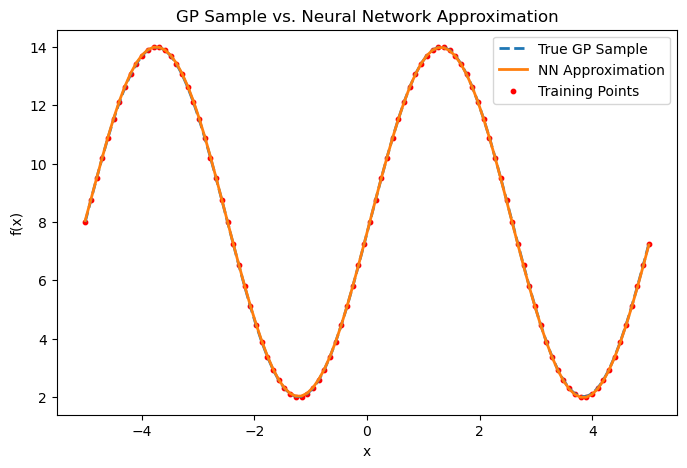

In [6]:
# Generate test data
x_test = np.linspace(-5.0, 5.0, 100).reshape(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)

# Predict using trained model
y_test_pred = model(x_test_tensor).detach().numpy()[:,0]

# Plot the GP sample and NN approximation
plt.figure(figsize=(8, 5))
plt.plot(x, 8 + 6*y, label="True GP Sample", linewidth=2, linestyle="dashed")
plt.plot(x_test, 8 + 6*y_test_pred, label="NN Approximation", linewidth=2)
plt.scatter(x, 8 + 6*y, color='red', s=10, label="Training Points")
plt.legend()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("GP Sample vs. Neural Network Approximation")
plt.show()


In [6]:
params = [param.detach().numpy().flatten() for param in model.parameters()]
flattened_params = np.concatenate(params)
print(flattened_params.shape)

np.savetxt(file_path + "true_weights.txt", flattened_params, delimiter = ",")

(61,)


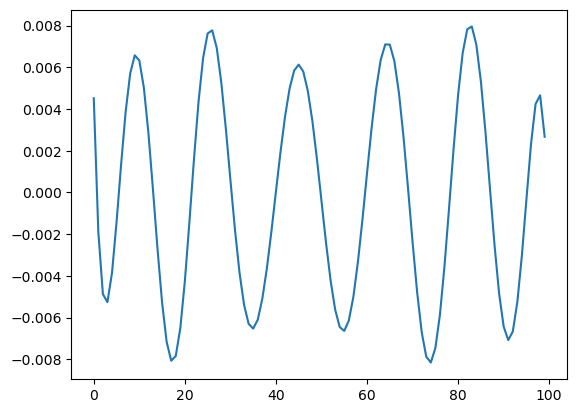

In [30]:
plt.figure()
plt.plot(y - y_test_pred)
plt.show()